(49, 49)
49


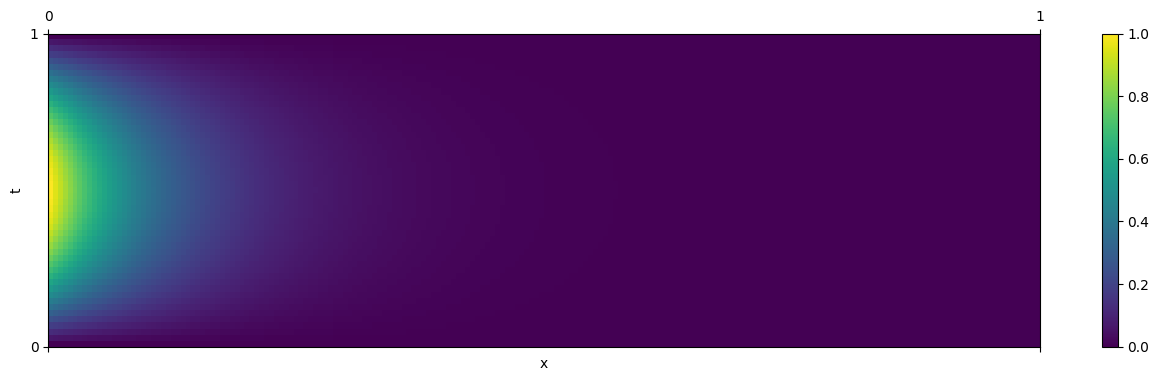

In [7]:
import numpy as np
import matplotlib.pyplot as plt

dx = 0.02
dt = 0.005
gamma = dt/dx**2
x = np.arange(0, 1+dx, dx)
t_arr = np.arange(0, 1+dt, dt)
f = np.sin(np.pi*x)

o = np.empty(len(x)-3)
m = np.empty(len(x)-2)

o.fill(-gamma) # Off diagonals
m.fill(1+2*gamma) # Main Diagonals
A = np.diag(o, -1) + np.diag(o, 1) + np.diag(m, 0) # Tri-Diagonal Matrix

print(np.shape(A))
print(np.size(f[1:-1]))

def solveSystem(f):
    res = np.linalg.solve(A, f[1:-1])
    res = np.pad(res, (1,1))
    return res

sol = np.array(f)
for t in t_arr:
    f = solveSystem(f)
    sol = np.vstack([sol, f])

sol = np.rot90(sol)
plt.matshow(sol, extent=[0, 1, 0, 1], origin='lower', aspect='auto')
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()
plt.show()